# Model Interpretation 

In [34]:
# ● Write Python code to: 
#     ○ Show the correlation matrix using a heatmap. 
#     ○ Identify which features have the strongest relationship with the target. 
#     ○ Discuss multicollinearity and how it might affect regression. 

imported all libraries

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

Fetched the data and changed features in dataframe to work on heatmap and output in series

In [36]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# target column is seperate so added seperately in dataframe
df['MedHouseVal']=data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


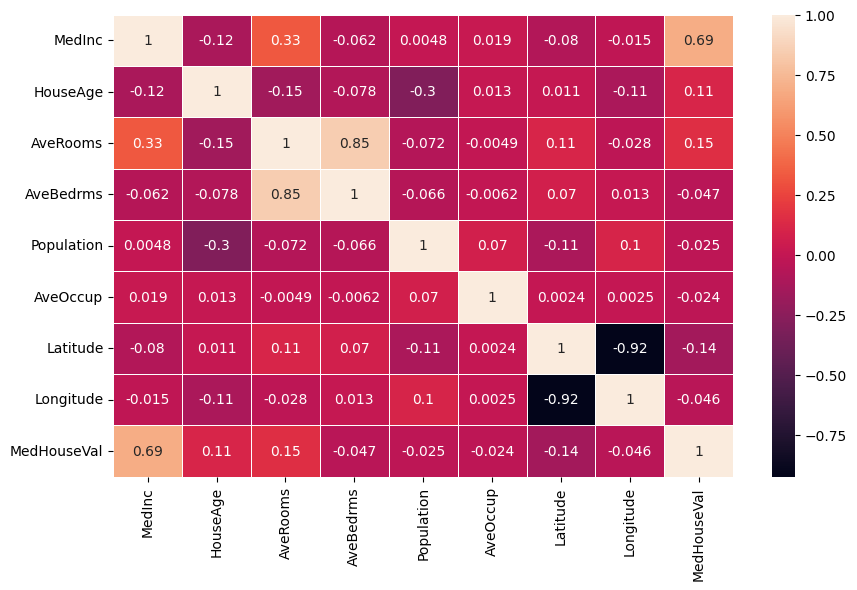

In [37]:
plt.figure(figsize=(10,6))

# linewidth for gaping
sns.heatmap(df.corr(), annot=True,linewidths=0.5)
plt.show()

- High absolute values close to +1 or −1

- Positive correlation → as the feature increases, so does the target

- Negative correlation → as the feature increases, the target decreases

In [43]:
target_corr = df.corr()['MedHouseVal']
print(target_corr.sort_values())

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64


In [47]:
# highest correlated
print(df['AveRooms'].corr(df['AveBedrms']))

0.8476213257130447


we can see that AveRooms and AveBedrms are highly correlated , so we can drop one to make model more stable

- what high correlation does??
  - small changes in data can cause large swings in coefficients.
  - make model unstable

In [50]:
# second highest correlated
print(df['MedInc'].corr(df['MedHouseVal']))

0.6880752079585478
